In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_heatmap(df, title):
  plt.figure(figsize=(5,5))
  sns.heatmap(df.set_index('q'), annot=True, fmt=".4f", cmap='RdBu_r', center=0, cbar=True)
  plt.title(title)
  plt.show()

def showDiff(file1, file2, variable):
  def get_nested_attr(data, attr):
    keys = attr.split('.')
    for key in keys:
        data = data[key]
    return data

  data1 = data2 = []
  with open(f'../results/{file1}.json') as f1, open(f'../results/{file2}.json') as f2:
    data1 = json.load(f1)
    data2 = json.load(f2)

  # Verify config has equal N, deltaQ, and delta
  assert data1["config"]["n"] == data2["config"]["n"]
  assert data1["config"]["deltaQ"] == data2["config"]["deltaQ"]
  assert data1["config"]["delta"] == data2["config"]["delta"]

  res1 = np.array(get_nested_attr(data1, variable))
  res2 = np.array(get_nested_attr(data2, variable))

  # Calculate differences
  cols = [f'p{i}' for i in range(1, data1['config']['n'] + 1)]
  res_diff = res1 - res2

  is2D = res_diff.ndim == 2
  res_diff_df = pd.DataFrame(res_diff, columns=cols) if is2D else pd.DataFrame(res_diff)

  q_values = np.arange(0, 1.05, data1["config"]["deltaQ"]) # round to 2 digits
  q_values = [round(q, 2) for q in q_values]

  res_diff_df.insert(0, 'q', q_values)

  plot_heatmap(res_diff_df, f'Difference in {variable}')

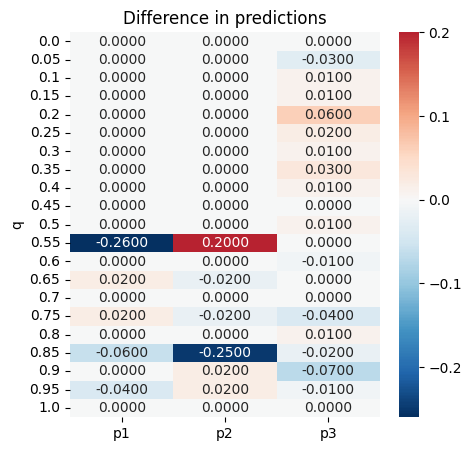

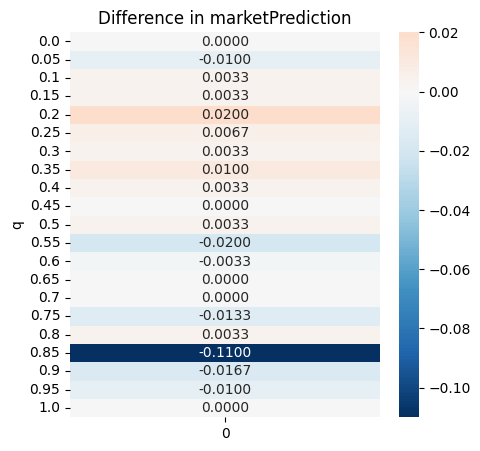

In [4]:
showDiff('1738621030', '1738621460', 'predictions')
showDiff('1738621030', '1738621460', 'finalPrediction')
showDiff('1738621030', '1738621460', 'marketPrediction')